# Семинар 4

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('laptops_10.csv')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Cpu', 'Ram', 'Gpu',
       'OpSys', 'Weight', 'Price_euros', 'Cpu_Company', 'Memory_Amount',
       'Memory_Type'],
      dtype='object')

## 1.1 Изучите количество памяти с помощью matplotlib

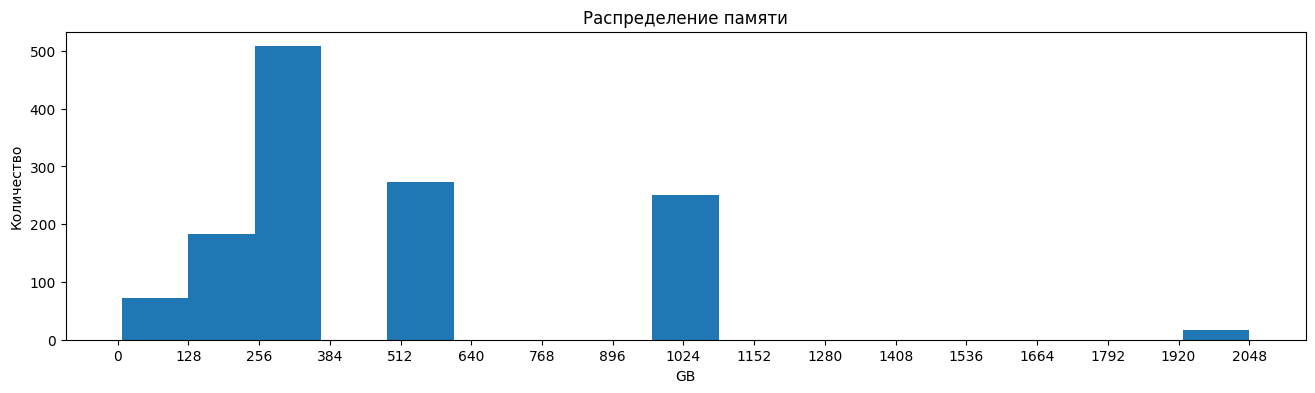

In [61]:
plt.figure(figsize=(16, 4))
plt.hist(df['Memory_Amount'], bins=17)
plt.title('Распределение памяти')
plt.ylabel('Количество')
plt.xlabel('GB')
plt.xticks(range(0, 2050, 128));

## 1.2 Изучите стоимость ноутбуков с помощью matplotlib


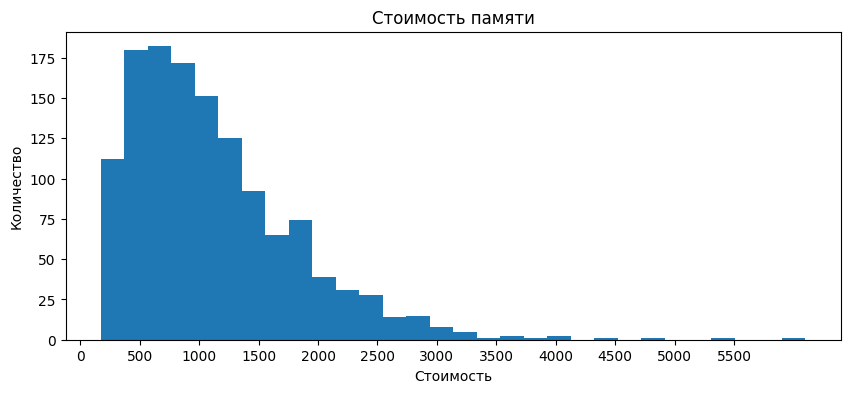

In [48]:
plt.figure(figsize=(10, 4))
plt.hist(df['Price_euros'], bins=30)
plt.title('Стоимость памяти')
plt.ylabel('Количество')
plt.xlabel('Стоимость')
plt.xticks(range(0,6000, 500));


## 1.3 Изучите вес ноутбуков с помощью matplotlib

Text(0, 0.5, 'Количество')

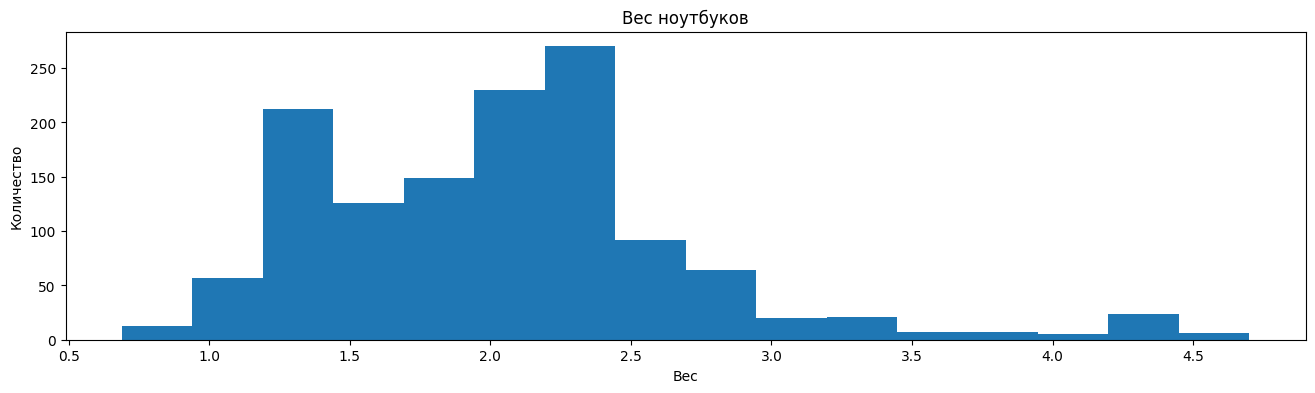

In [63]:
plt.figure(figsize=(16, 4))
plt.hist(df['Weight'], bins=16)
plt.title('Вес ноутбуков')
plt.xlabel('Вес')
plt.ylabel('Количество')


## Задание 2.

## 2.1 Изучите распределение типов носителя


In [23]:
memory_type_df = df['Memory_Type'].value_counts()
memory_type_df.head()


SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: Memory_Type, dtype: int64

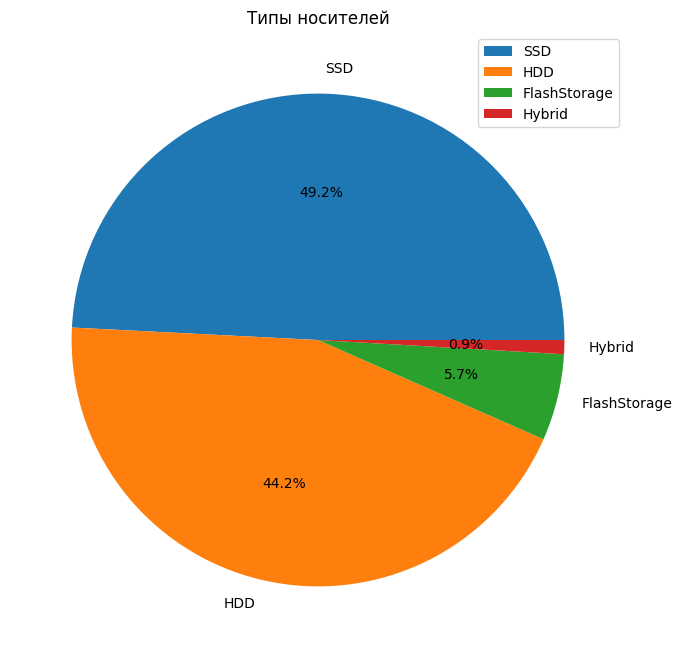

In [45]:
plt.figure(figsize=(10, 8))
plt.pie(memory_type_df.values, labels=memory_type_df.index, autopct='%.1f%%');
plt.title('Типы носителей')
plt.legend(memory_type_df.index, loc='upper right');

## 2.2 Изучите распределение компаний производителей


In [83]:
company_df = df['Company'].value_counts()
company_df

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

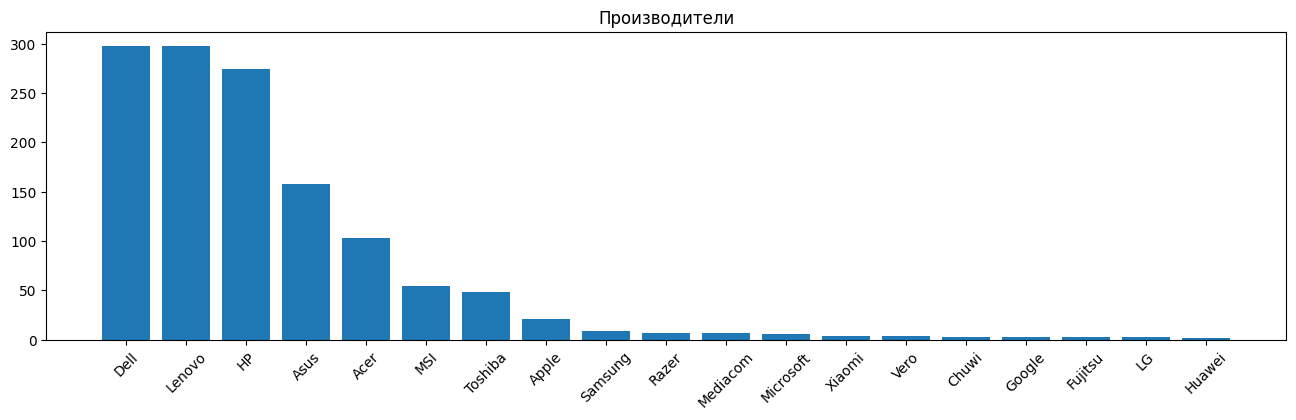

In [84]:
plt.figure(figsize=(16, 4))
plt.bar(company_df.index, company_df.values);
plt.title('Производители')
plt.xticks(rotation=45);

## 2.3 Изучите распределение операционной системы


In [73]:
os_df = df['OpSys'].value_counts()
os_df

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

Text(0.5, 1.0, 'Операционные системы')

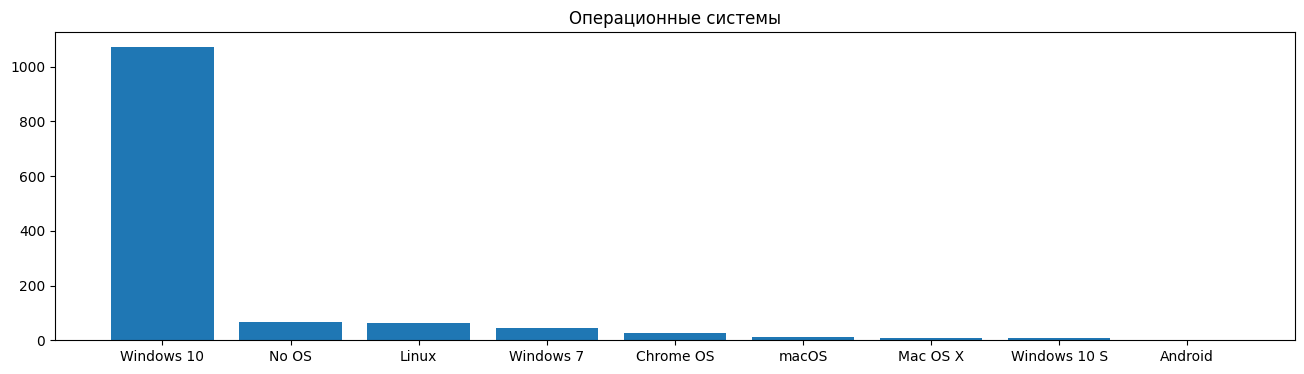

In [78]:
plt.figure(figsize=(16, 4))
plt.bar(os_df.index, os_df.values);
plt.title('Операционные системы')
# plt.xticks(rotation=45);

## 2.4 Изучите распределение компаний производителей CPU


In [79]:
cc_df = df['Cpu_Company'].value_counts()
cc_df

Intel      1240
AMD          62
Samsung       1
Name: Cpu_Company, dtype: int64

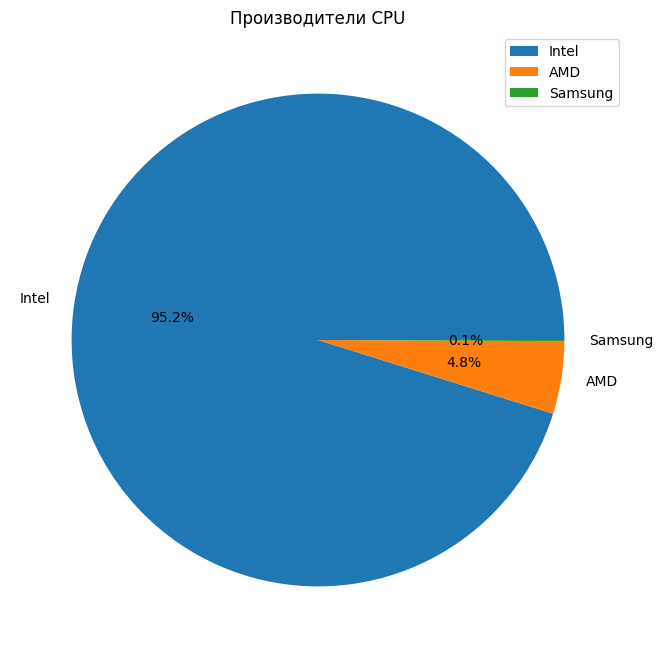

In [81]:
plt.figure(figsize=(10, 8))
plt.pie(cc_df.values, labels=cc_df.index, autopct='%.1f%%');
plt.title('Производители CPU')
plt.legend(cc_df.index, loc='upper right');

## Задание 3.

Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму

Процессоры от Samsung не изучайте



## 3.1 Постройте график в абсолютных величинах


In [93]:
data = pd.crosstab(df['Company'], df['Cpu_Company'])
data

Cpu_Company,AMD,Intel,Samsung
Company,,,
Acer,10,93,0
Apple,0,21,0
Asus,11,147,0
Chuwi,0,3,0
Dell,0,297,0
Fujitsu,0,3,0
Google,0,3,0
HP,25,249,0
Huawei,0,2,0


In [94]:
data = data.drop(columns=['Samsung']).reset_index()


In [99]:
data

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


n_ticks =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


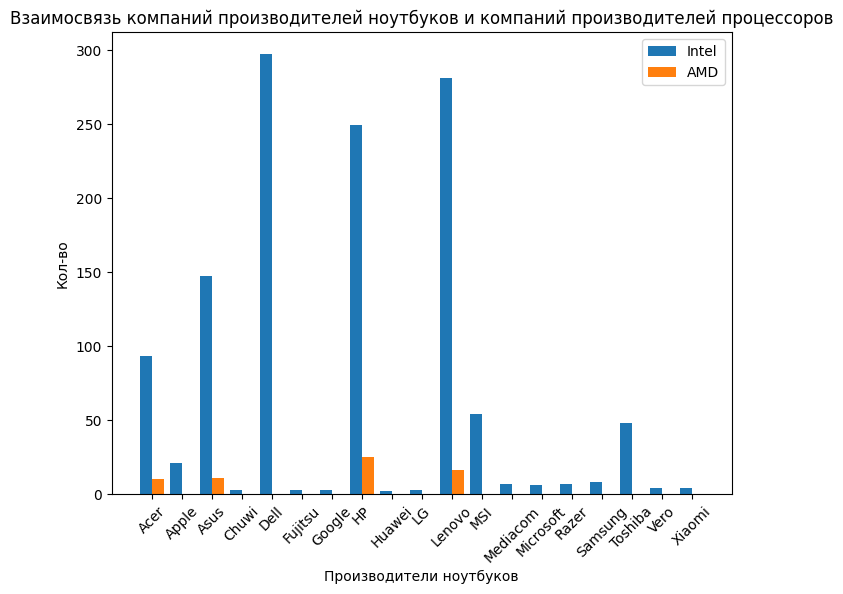

In [104]:
plt.figure(figsize=(8, 6))

# определяем кол-во делений
n_ticks = np.arange(len(data['Intel']))
print('n_ticks = ', n_ticks)

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['Intel'], width=w)
plt.bar(n_ticks + offset, data['AMD'], width=w)

plt.title('Взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров')
plt.xlabel('Производители ноутбуков')
plt.ylabel('Кол-во')
plt.legend(['Intel', 'AMD'])
plt.xticks(n_ticks, data['Company'], rotation = 45);  # добавляем метки делений

## 3.2 Постройте график в относительных величинах


In [106]:
data_norm = pd.crosstab(df['Company'], df['Cpu_Company'], normalize='index')
data_norm

Cpu_Company,AMD,Intel,Samsung
Company,,,
Acer,0.097087,0.902913,0.000000
Apple,0.000000,1.000000,0.000000
Asus,0.069620,0.930380,0.000000
Chuwi,0.000000,1.000000,0.000000
Dell,0.000000,1.000000,0.000000
Fujitsu,0.000000,1.000000,0.000000
Google,0.000000,1.000000,0.000000
HP,0.091241,0.908759,0.000000
Huawei,0.000000,1.000000,0.000000


In [107]:
data_norm = data_norm.drop(columns=['Samsung']).reset_index()
data_norm

Cpu_Company,Company,AMD,Intel
0,Acer,0.097087,0.902913
1,Apple,0.000000,1.000000
2,Asus,0.069620,0.930380
3,Chuwi,0.000000,1.000000
4,Dell,0.000000,1.000000
5,Fujitsu,0.000000,1.000000
6,Google,0.000000,1.000000
7,HP,0.091241,0.908759
8,Huawei,0.000000,1.000000
9,LG,0.000000,1.000000


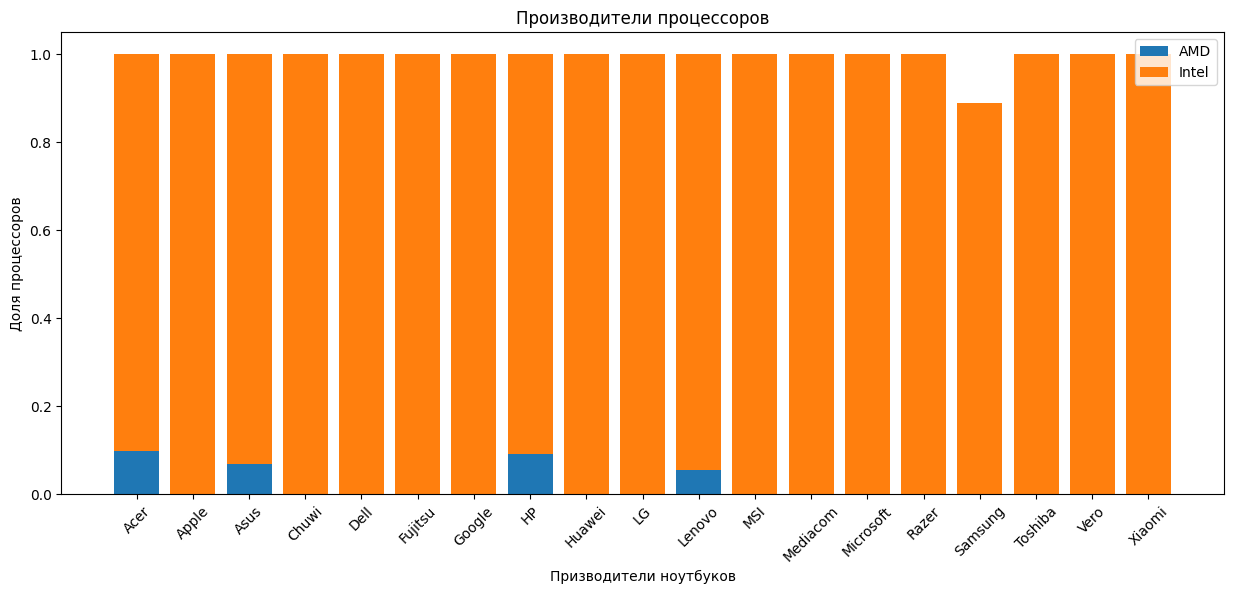

In [111]:
plt.figure(figsize=(15, 6))

plt.bar(data_norm['Company'], data_norm['AMD'])
plt.bar(data_norm['Company'], data_norm['Intel'], bottom=data_norm['AMD'])

plt.title('Производители процессоров')
plt.xlabel('Призводители ноутбуков')
plt.ylabel('Доля процессоров')
plt.legend(['AMD', 'Intel'])
plt.xticks(rotation = 45);

# Задание 4.

## 4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора

![boxplot](https://theslide.ru/img/thumbs/e14ad4f75bfd162e7ec3b45c006063d0-800x.jpg)

![1](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png)

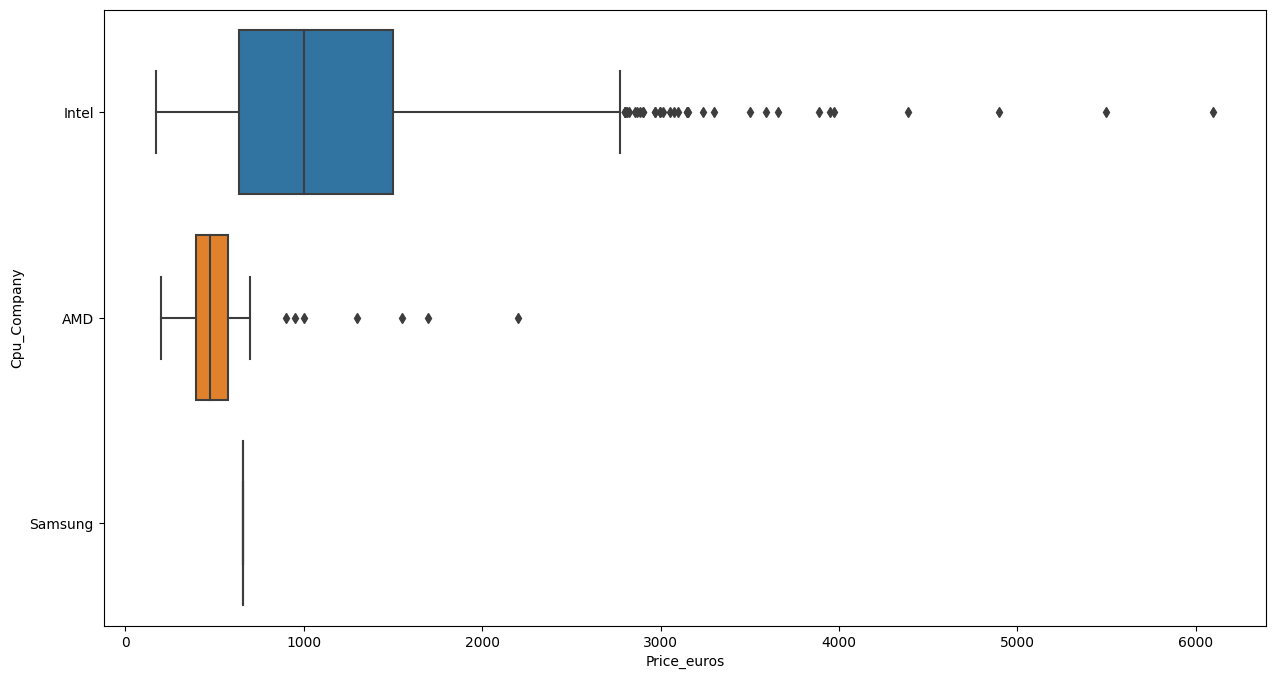

In [113]:
plt.figure(figsize=(15,8))
sns.boxplot(y=df["Cpu_Company"], x=df["Price_euros"])
plt.ylabel("Cpu_Company")
plt.xlabel("Price_euros");

## 4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти

In [4]:
plt.figure(figsize=(15,8))
sns.boxplot(y=df["Memory_Type"], x=df["Price_euros"])
plt.ylabel("Memory_Type")
plt.xlabel("Price_euros");

NameError: name 'df' is not defined

<Figure size 1080x576 with 0 Axes>

## 4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти

In [5]:
plt.figure(figsize=(15,8))
sns.boxplot(y=df["Ram"], x=df["Price_euros"])
plt.ylabel("Ram")
plt.xlabel("Price_euros");

NameError: name 'df' is not defined

<Figure size 1080x576 with 0 Axes>

## 4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя


In [1]:
plt.figure(figsize=(15,8))
sns.boxplot(y=df["Company"], x=df["Price_euros"])
plt.ylabel("Company")
plt.xlabel("Price_euros");

NameError: name 'plt' is not defined

# Задание 5*

Постройте матрицу корреляций для таблицы

In [141]:
corr_matrix = df.corr().round(2)
# corr_matrix = np.round(df.corr(), 2)
corr_matrix

C:\Users\Palex\AppData\Local\Temp\ipykernel_28320\3194823682.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().round(2)


,Inches,Weight,Price_euros,Memory_Amount
Inches,1.00,0.83,0.07,0.27
Weight,0.83,1.00,0.21,0.18
Price_euros,0.07,0.21,1.00,-0.13
Memory_Amount,0.27,0.18,-0.13,1.00


+ до 0,2 - Очень слабая
+ до 0,5 - Слабая
+ до 0,7 - Средняя
+ до 0,9 - Высокая
+ свыше 0,9 - Очень высокая корреляция

In [142]:
corr_matrix[np.abs(corr_matrix)<=0.1] = 0
corr_matrix

,Inches,Weight,Price_euros,Memory_Amount
Inches,1.00,0.83,0.00,0.27
Weight,0.83,1.00,0.21,0.18
Price_euros,0.00,0.21,1.00,-0.13
Memory_Amount,0.27,0.18,-0.13,1.00


<AxesSubplot: >

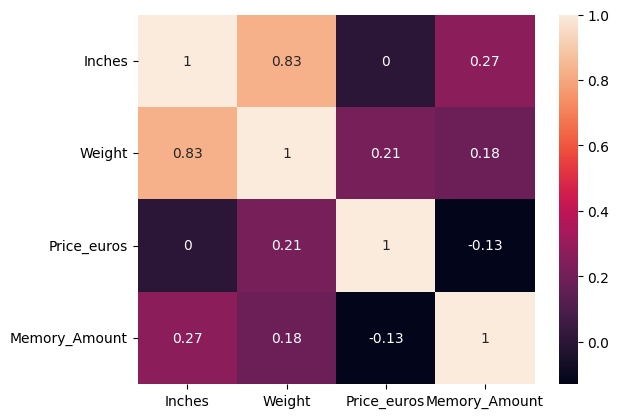

In [143]:
sns.heatmap(corr_matrix, annot=True)